In [4]:
#Load the required python tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import emoji
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings("ignore")
%matplotlib inline

#  **LOADING DATA**

In [5]:
#load the data into the pandas dataframe

df = pd.read_csv("/kaggle/input/deep-learning/Copy of behaviour_content_simulation_train - Sheet1.csv")
df.head(20)

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
5,6,2020-11-15 16:01:08,525,An 85-year-old primary school in Shanghai has ...,cnni,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cnn
6,7,2019-10-24 10:51:03,0,LASU Celebrates New Dawn Of Unbroken Peace As ...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
7,8,2018-07-17 22:04:26,3,Next week CNCF will be publishing a series of ...,CiscoCloud,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cisco
8,9,2019-03-27 12:18:01,572,A 95-year-old World War II veteran says he was...,cnni,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn
9,10,2020-08-01 05:24:03,127,"Nicholas Hoult, Charlize Theron, and Aisha Tyl...",GettyVIP,[Photo(previewUrl='https://pbs.twimg.com/media...,getty images


In [6]:
df.shape

(300000, 7)

In [7]:
df.columns

Index(['id', 'date', 'likes', 'content', 'username', 'media',
       'inferred company'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                300000 non-null  int64 
 1   date              300000 non-null  object
 2   likes             300000 non-null  int64 
 3   content           300000 non-null  object
 4   username          300000 non-null  object
 5   media             300000 non-null  object
 6   inferred company  300000 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB


In [ ]:
# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['Date'])

# Normalization

In [50]:
# we will normalie the content data to lowercase and remove puncuations and emojis  
# we will also drop any rows with missing values if found 
df['content'] = df['content'].str.lower()
df['content'] = df['content'].str.replace('[^\w\s]', '')
df['content'] = df['content'].str.replace('[^\x00-\x7F]+', '')
df.dropna(inplace=True)  # Drop rows with missing values

# Punctuation Removal

In [51]:
# Remove punctuation using str.replace() method
df['content'] = df['content'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


# Emoticon and Noise Removal

In [52]:
def remove_emoticons(text):
    # Remove emoticons
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_noise(text):
    # Remove unwanted text (noise)
    # Example: Removing URLs, mentions, hashtags, special characters, etc.
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters except whitespace
    text = re.sub(r'\s+', ' ', text)     # Remove extra whitespace
    return text.strip()

# Assuming 'df' is your DataFrame and 'content' is the column containing text
df['content'] = df['content'].apply(remove_emoticons)
df['content'] = df['content'].apply(remove_noise)


# Handling Missing Values

In [53]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Impute missing values for numerical columns with mean
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Remove rows with any remaining missing values
df.dropna(inplace=True)

# Check again for missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)


Missing values before handling:
id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64
Missing values after handling:
id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64


# Spread Analysis: Exploring Statistical Measures

In [54]:
# we will calculate the measure of spread ( range, quartiles and the interquartile range, variance and standard deviation)
spread_stats = df.describe()
print(spread_stats)


                  id          likes
count  300000.000000  300000.000000
mean   150000.500000     773.364793
std     86602.684716    4931.463419
min         1.000000       0.000000
25%     75000.750000       3.000000
50%    150000.500000      76.000000
75%    225000.250000     364.000000
max    300000.000000  560193.000000


# graphical representation

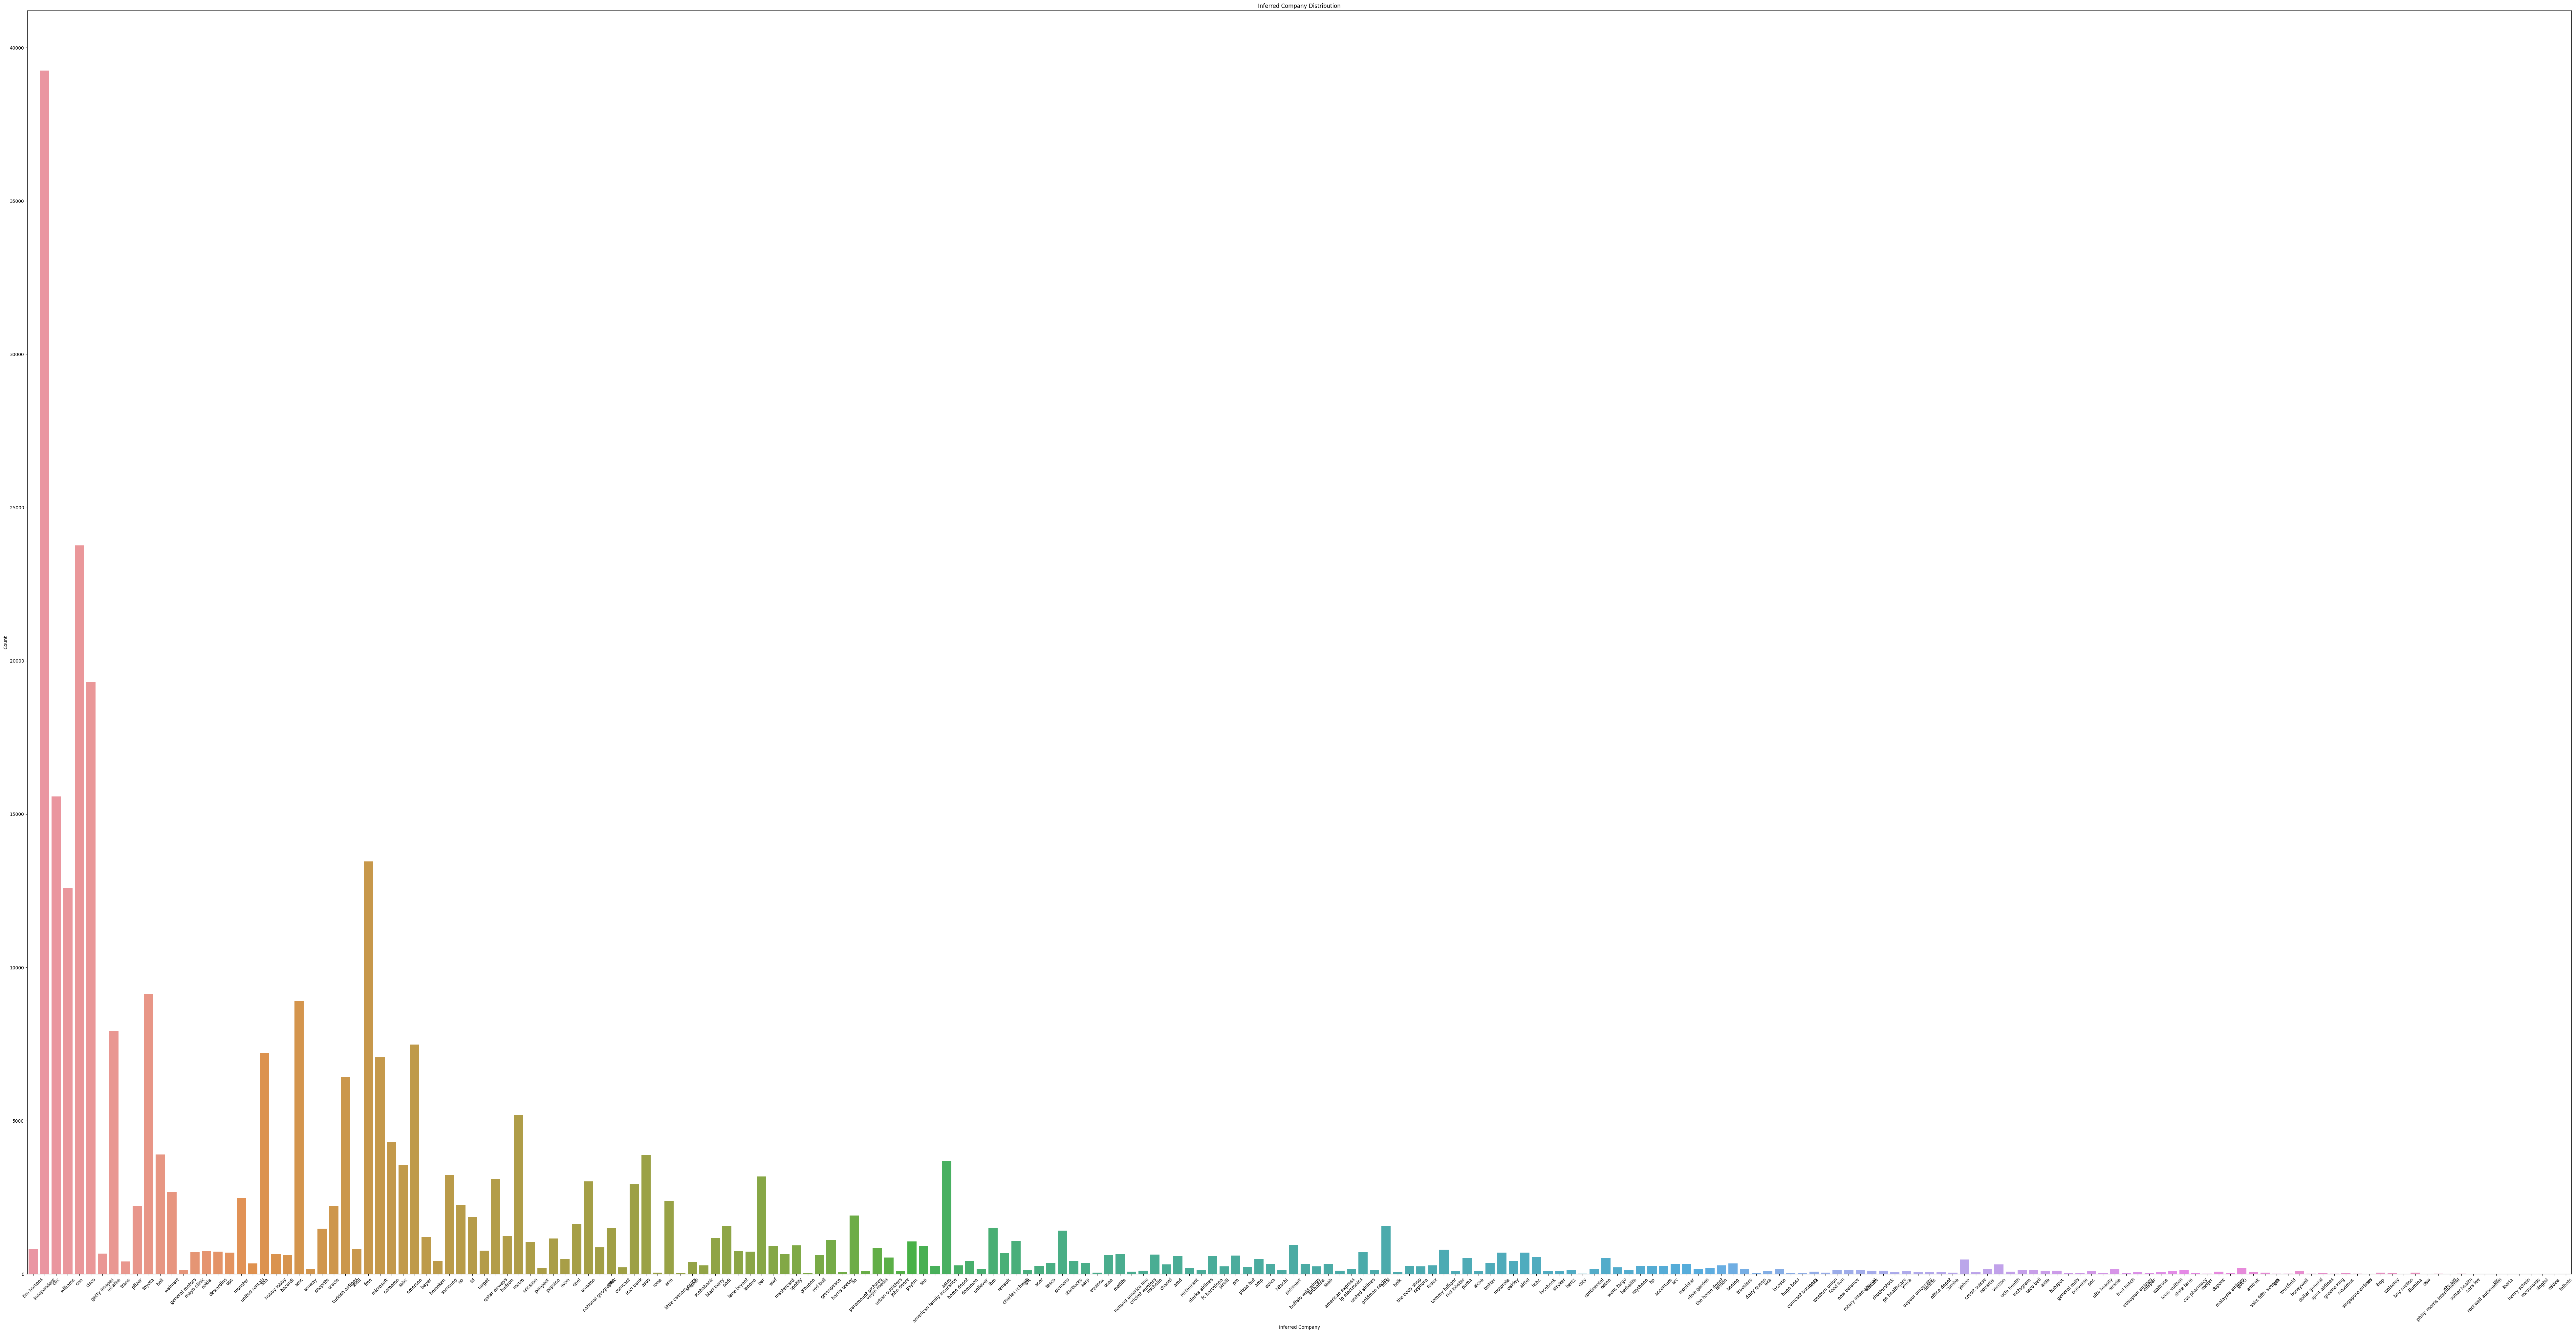

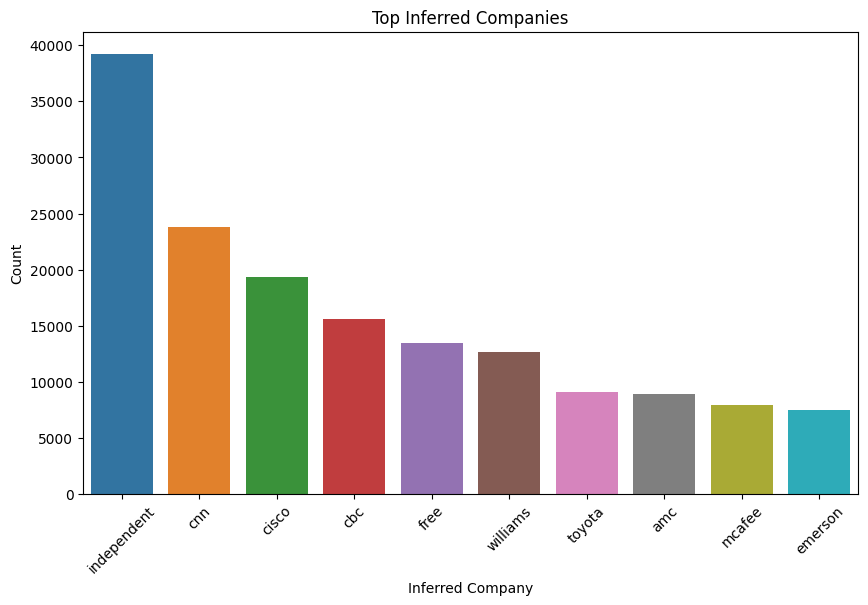

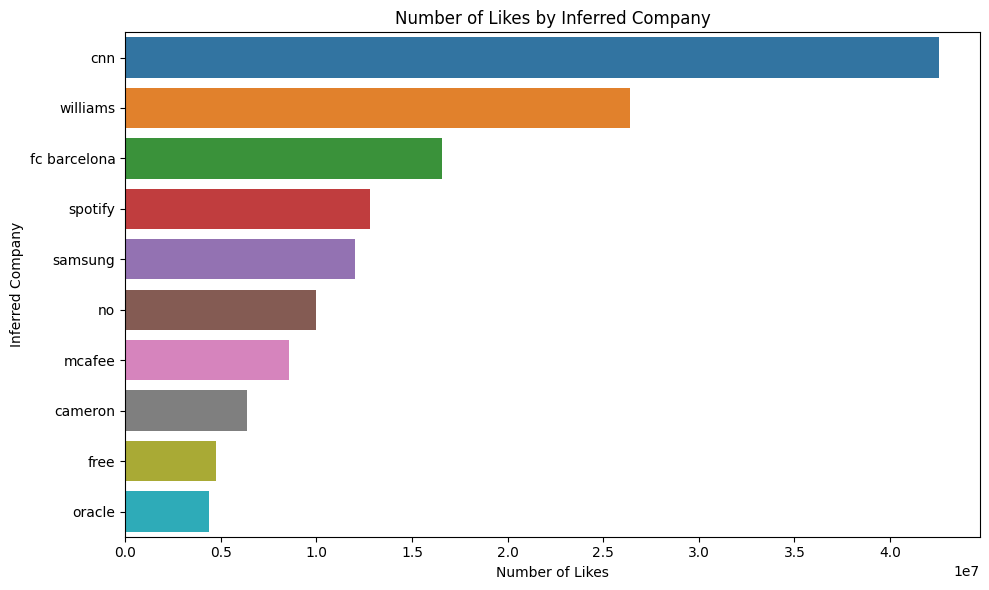

In [55]:
# graphical representation for the inferred companies


plt.figure(figsize=(100, 50))
sns.countplot(x='inferred company', data=df)
plt.title('Inferred Company Distribution')
plt.xlabel('Inferred Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

company_counts = df['inferred company'].value_counts().reset_index()
company_counts.columns = ['inferred company', 'count']
top_companies = company_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='inferred company', y='count', data=top_companies)
plt.title(f'Top Inferred Companies')
plt.xlabel('Inferred Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# company with the no of likes for each 
company_likes = df.groupby('inferred company')['likes'].sum().reset_index()
company_likes_sorted = company_likes.sort_values(by='likes', ascending=False)
top_companies = company_likes_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='likes', y='inferred company', data=top_companies)
plt.title('Number of Likes by Inferred Company')
plt.xlabel('Number of Likes')
plt.ylabel('Inferred Company')
plt.tight_layout()
# plt.yticks(rotation=45, ha='right') 


plt.show()

# Outlier Detection

Outliers:
Series([], Name: date, dtype: int32)
Mode of Inferred Company: independent
Most Common Company: independent


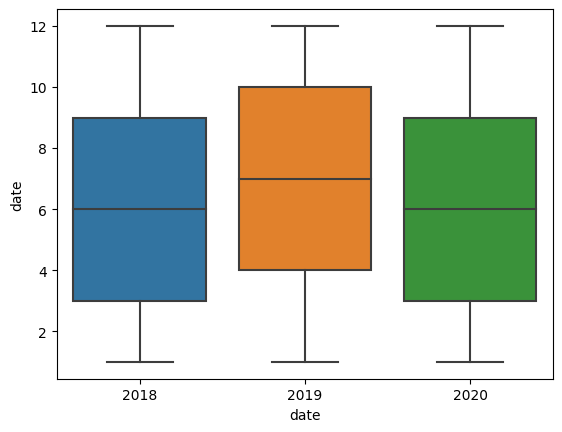

In [56]:
# Handling missing values
df.dropna(inplace=True)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Visualizing spread using a boxplot
sns.boxplot(x=df['date'].dt.year, y=df['date'].dt.month)

# Function to find outliers using the IQR method
def find_outliers(data, multiplier=1.5):
    """
    Finds outliers in the given data using the IQR method.

    Parameters:
    - data: A pandas Series containing numerical data.
    - multiplier: Multiplier for determining the range of outliers. Default is 1.5.

    Returns:
    - outliers: A pandas Series containing the outliers.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Finding outliers in 'date' column
outliers = find_outliers(df['date'].dt.year)

print("Outliers:")
print(outliers)

# Handling categorical variables
mode_company = df['inferred company'].mode().iloc[0]  # Handle missing values
company_counts = df['inferred company'].value_counts()
most_common_company = company_counts.idxmax()  # Most frequent company

print(f"Mode of Inferred Company: {mode_company}")
print(f"Most Common Company: {most_common_company}")


# Central Tendency

In [59]:
# Group by 'inferred_company', calculate mean, median, and mode for 'likes', and then sort by mean likes
company_stats = df.groupby('inferred company')['likes'].agg(['mean', 'median', lambda x: x.mode()[0]]).sort_values(by='mean', ascending=False)

# Select top ten companies based on mean likes
top_ten_companies = company_stats.head(10)

print("Top Ten Companies Statistics:")
print(top_ten_companies)

Top Ten Companies Statistics:
                          mean   median  <lambda_0>
inferred company                                   
fc barcelona      28486.750430  22976.0       16554
stryker           18076.571429   3467.0        2066
tesla             17794.014085  15147.0           8
gucci             14273.000000   6212.5        1505
spotify           13793.822006   4535.0        1626
louis vuitton     11386.795455   7498.0        2981
twitter           10259.860399   2890.0        1042
oakley             8575.701923   5417.5        2706
chanel             5959.474026   2403.0        1396
saab               5157.702786   3313.0        1048


# skewness and kurtosis

In [91]:
# Define a function to calculate skewness and kurtosis for a group
def calculate_stats(group):
    return pd.Series({'skew': skew(group), 'kurt': kurtosis(group)})

# Group by 'inferred_company' and apply the function to calculate skewness and kurtosis for 'likes'
company_stats = df.groupby('inferred company')['likes'].apply(calculate_stats)

# Select the top ten companies based on skewness
top_ten_companies = company_stats.nlargest(10, 'first')

# Print statistics for each company
for company, stats in top_ten_companies.items():
    print(f'Company: {company}')
    if isinstance(stats, float):
        print(f'Skewness: {stats:.2f}')
    else:
        print(f'Skewness: {stats["skew"]:.2f}')
        print(f'Kurtosis: {stats["kurt"]:.2f}')
    print('-----------------------------------')

Company: ('independent', 'kurt')
Skewness: 7598.56
-----------------------------------
Company: ('aaa', 'kurt')
Skewness: 6073.06
-----------------------------------
Company: ('cnn', 'kurt')
Skewness: 2806.95
-----------------------------------
Company: ('cisco', 'kurt')
Skewness: 1829.51
-----------------------------------
Company: ('amazon', 'kurt')
Skewness: 1460.62
-----------------------------------
Company: ('cameron', 'kurt')
Skewness: 1315.56
-----------------------------------
Company: ('microsoft', 'kurt')
Skewness: 1179.93
-----------------------------------
Company: ('pfizer', 'kurt')
Skewness: 1095.97
-----------------------------------
Company: ('wwf', 'kurt')
Skewness: 888.21
-----------------------------------
Company: ('toyota', 'kurt')
Skewness: 780.18
-----------------------------------


# Line Graphs: To observe trends over time.

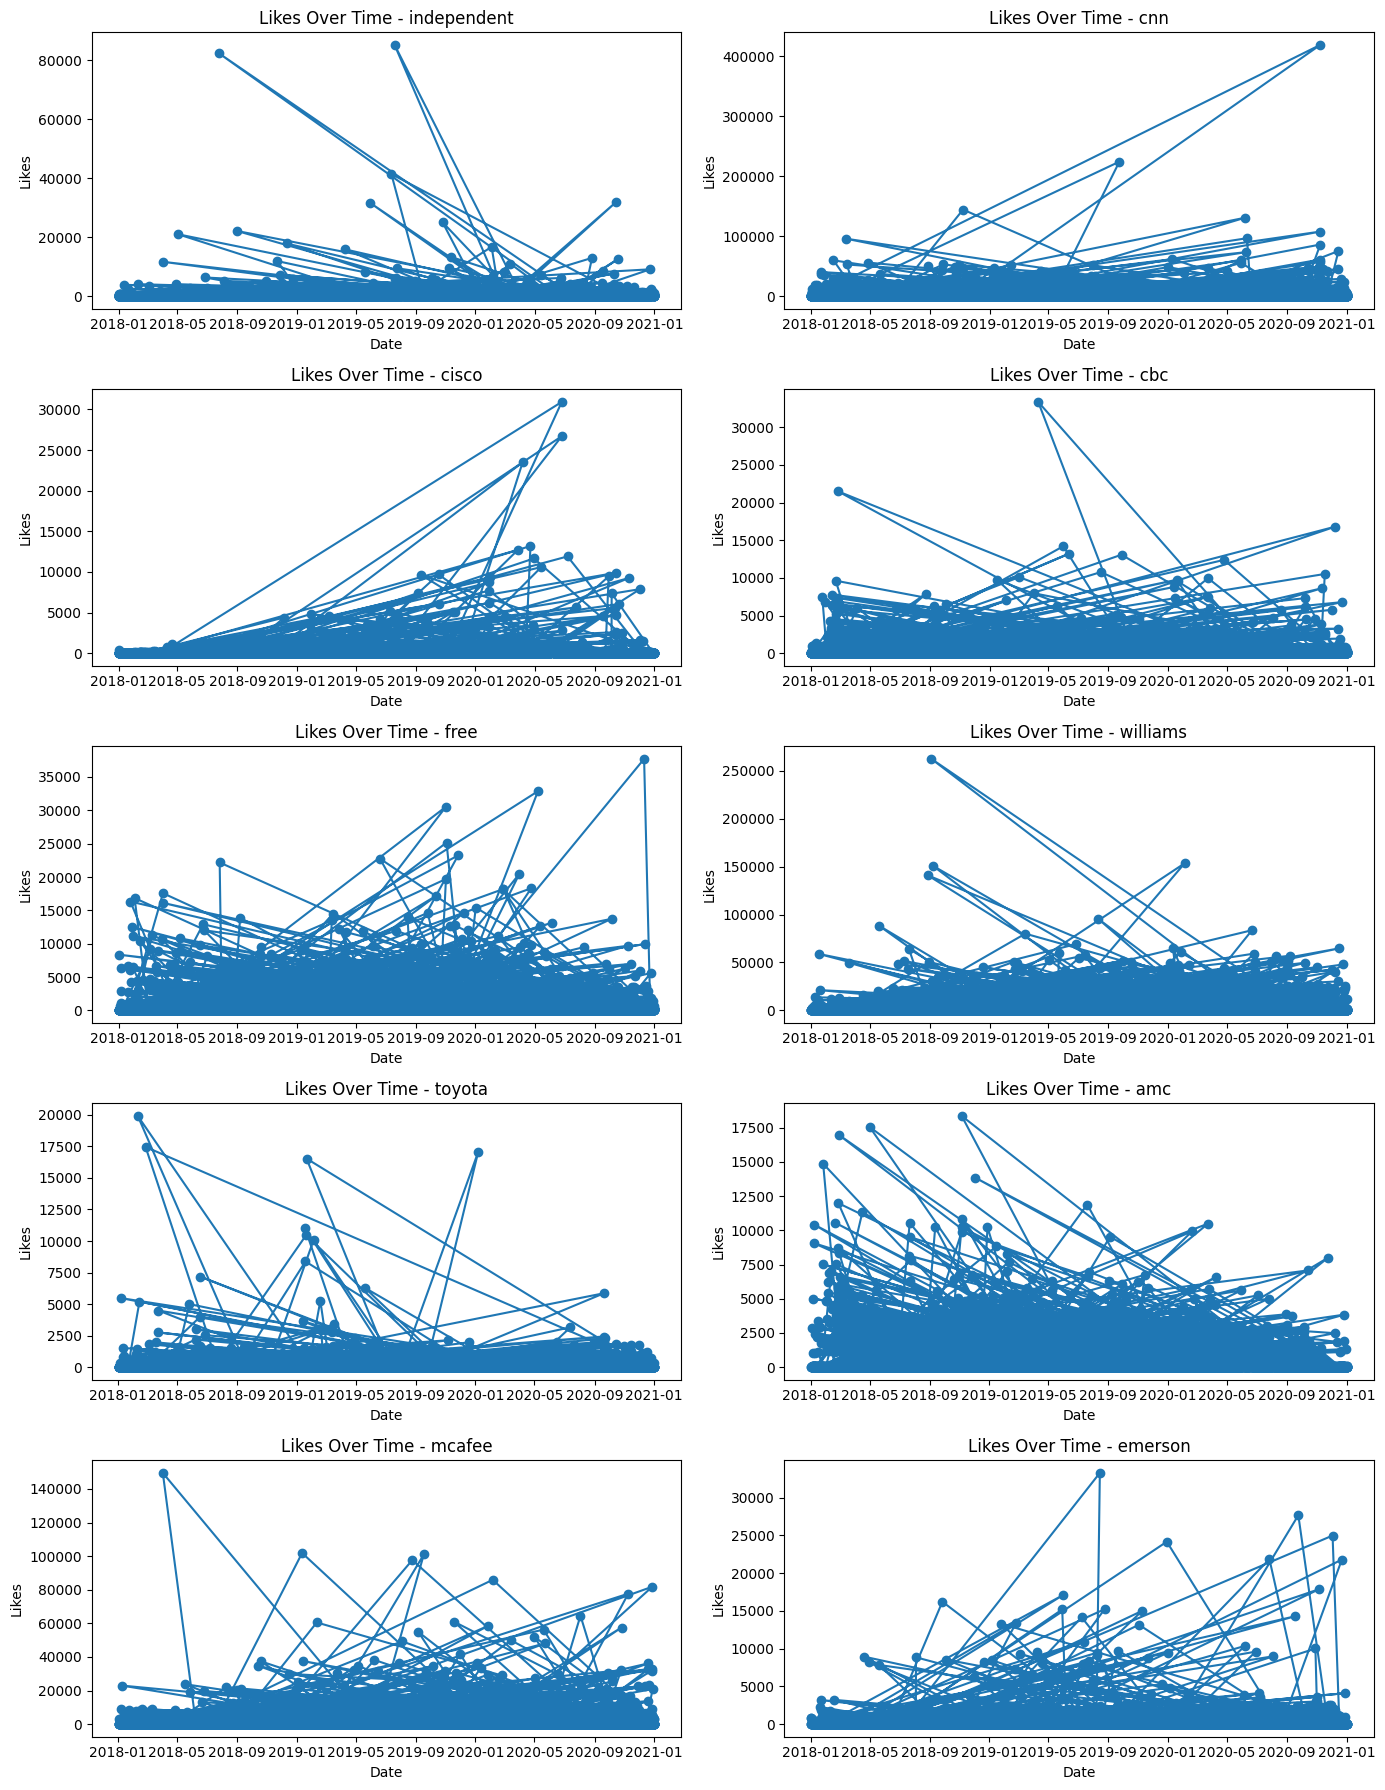

In [95]:
# Select the top ten companies
top_ten_companies = df['inferred company'].value_counts().nlargest(10).index

# Create subplots for each company
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 18))
plt.subplots_adjust(hspace=0.5)

# Plot line graphs for each company
for i, company in enumerate(top_ten_companies):
    ax = axes[i // 2, i % 2]
    company_data = df[df['inferred company'] == company]
    ax.plot(company_data['date'], company_data['likes'], marker='o', linestyle='-')
    ax.set_title(f'Likes Over Time - {company}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Likes')

plt.tight_layout()
plt.show()

# Bar Graphs: For categorical data comparison.

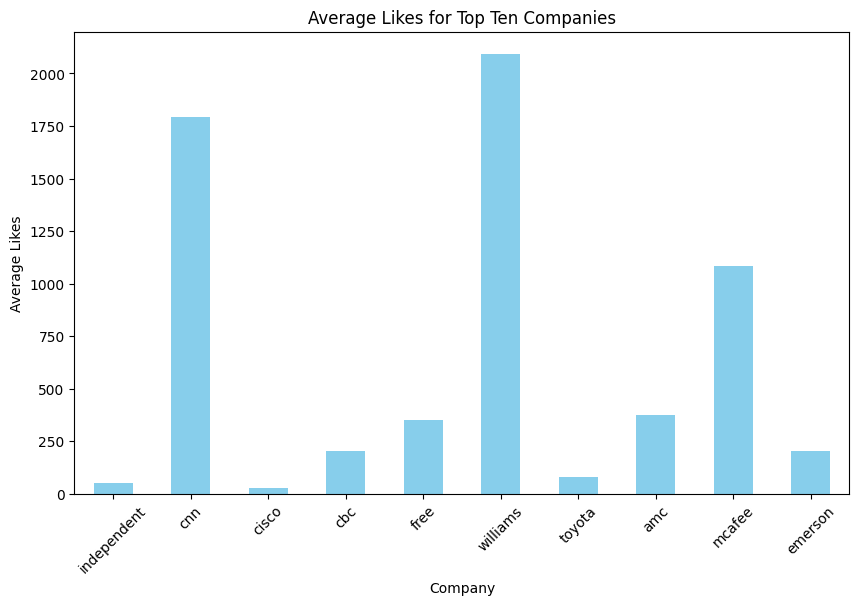

In [100]:
# Select the top ten companies
top_ten_companies = df['inferred company'].value_counts().nlargest(10).index

# Calculate the average likes for each company
average_likes = df.groupby('inferred company')['likes'].mean()

# Create a bar plot for average likes for each company
plt.figure(figsize=(10, 6))
average_likes[top_ten_companies].plot(kind='bar', color='skyblue')
plt.title('Average Likes for Top Ten Companies')
plt.xlabel('Company')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.show()

# Pie Charts: To represent data proportions.

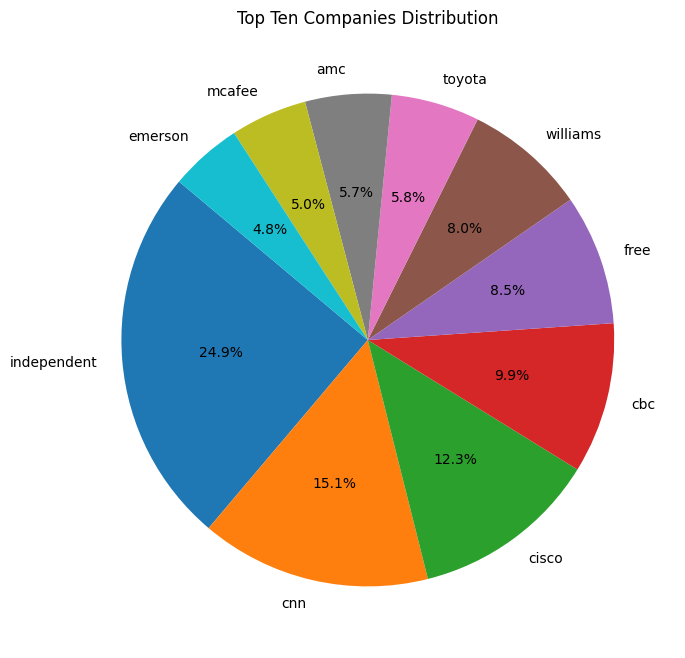

In [98]:
# Select the top ten companies
top_ten_companies = df['inferred company'].value_counts().nlargest(10)

# Plot a pie chart for the distribution of top ten companies
plt.figure(figsize=(8, 8))
plt.pie(top_ten_companies, labels=top_ten_companies.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Ten Companies Distribution')
plt.show()

# Scatter Plots: To find correlations between variables.

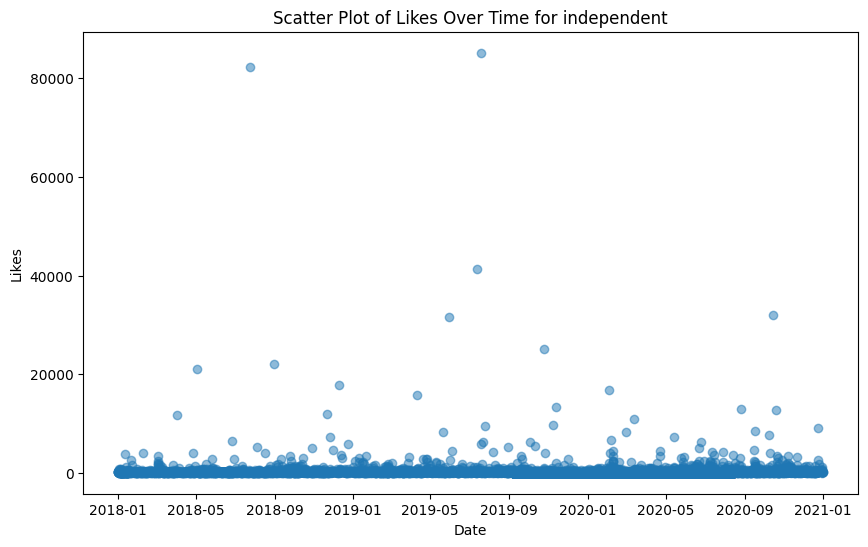

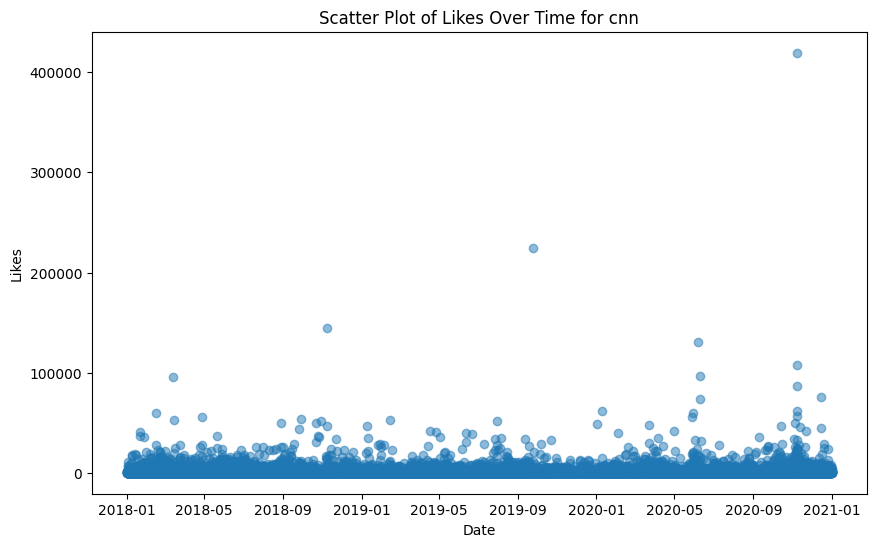

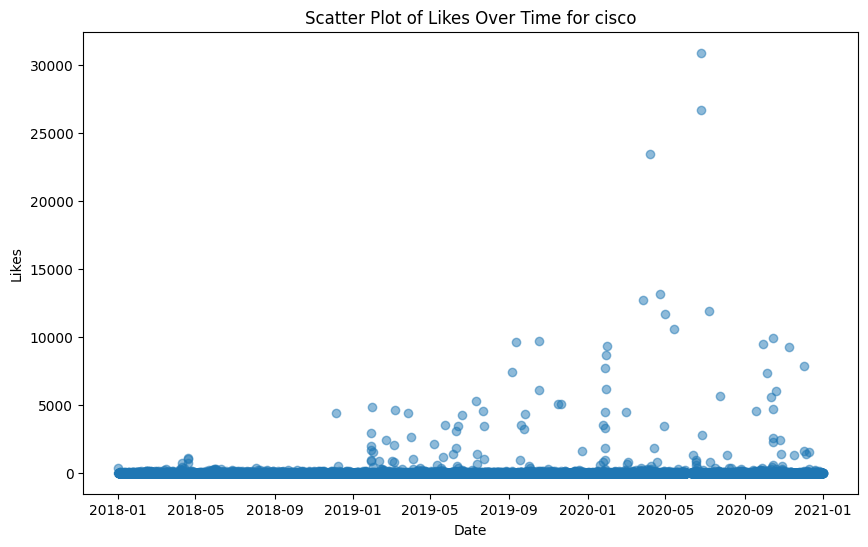

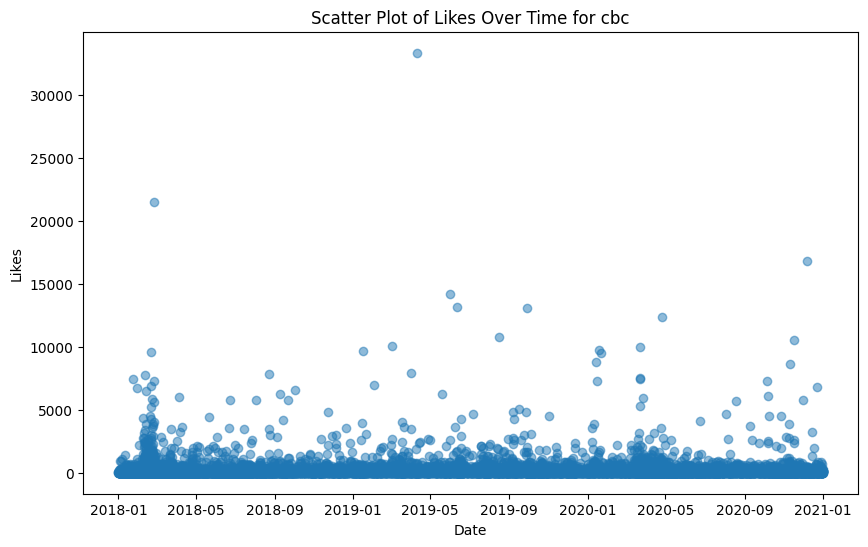

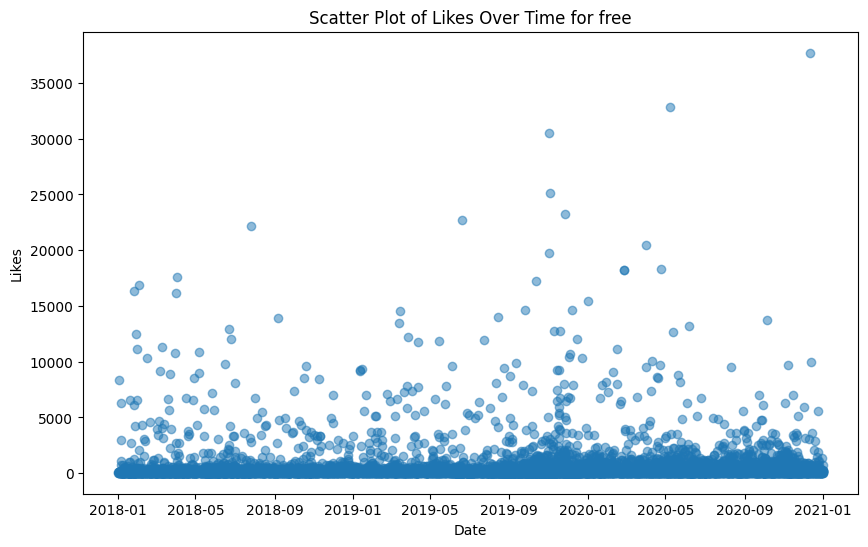

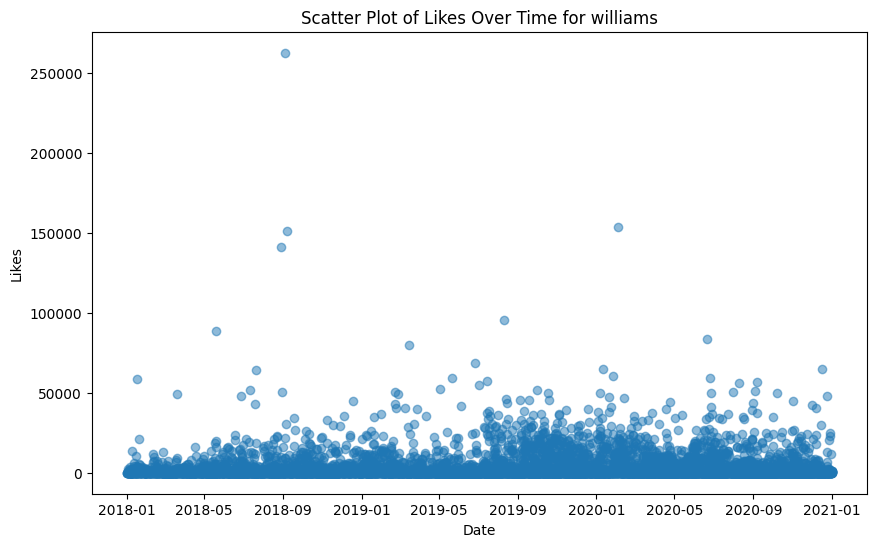

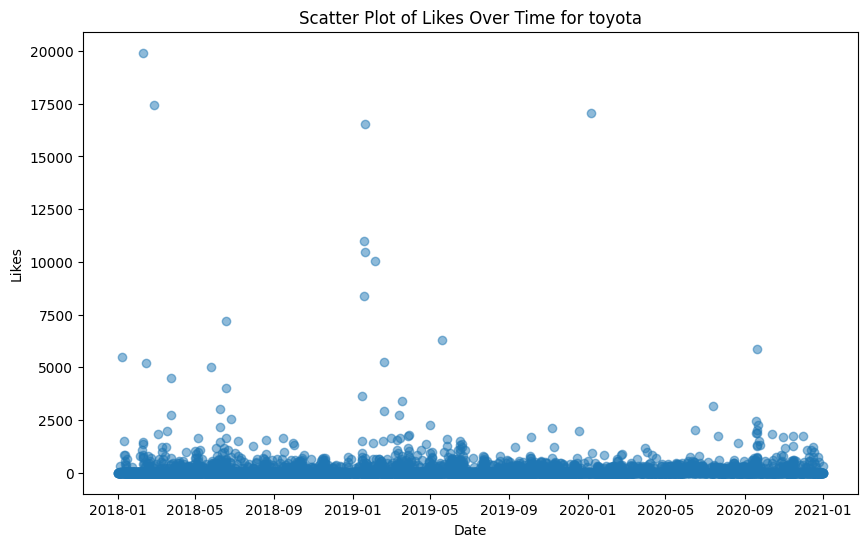

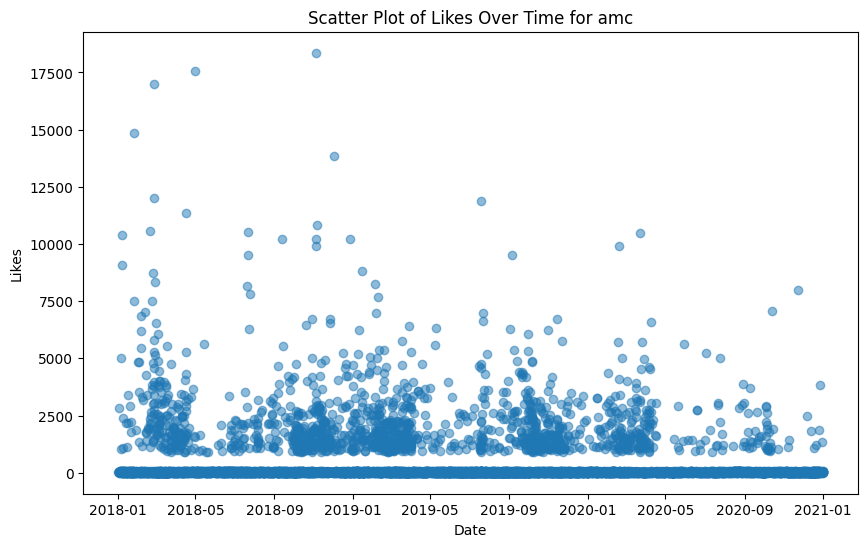

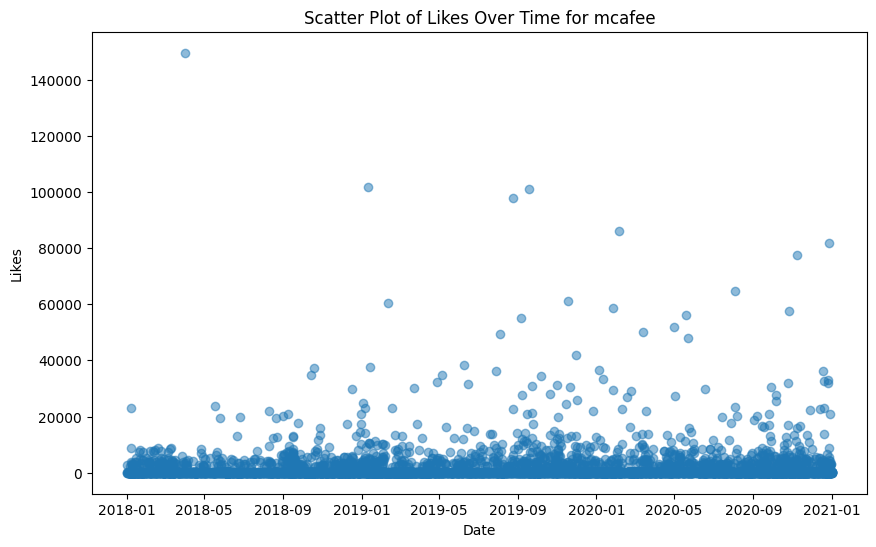

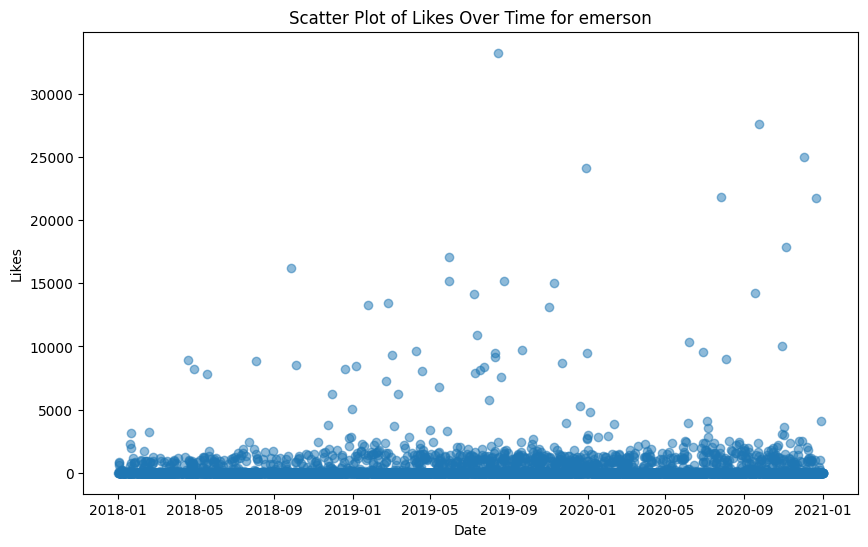

In [102]:

# Create scatter plots for each company
for company in top_ten_companies:
    company_data = df[df['inferred company'] == company]
    plt.figure(figsize=(10, 6))
    plt.scatter(company_data['date'], company_data['likes'], alpha=0.5)
    plt.title(f'Scatter Plot of Likes Over Time for {company}')
    plt.xlabel('Date')
    plt.ylabel('Likes')
    plt.show()

# Box Plots: To visualize the distribution and identify outliers.

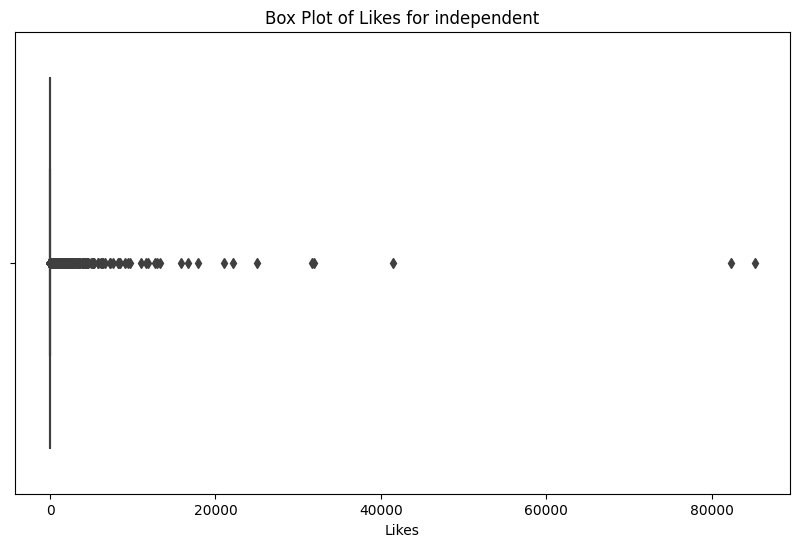

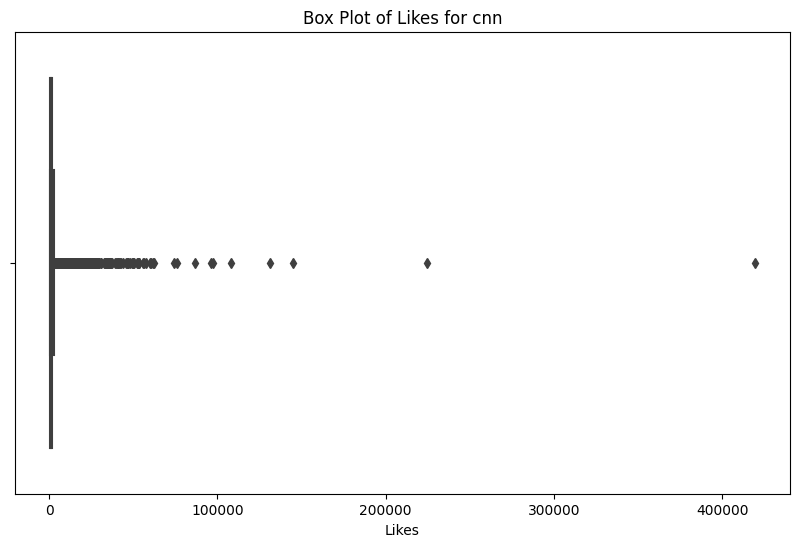

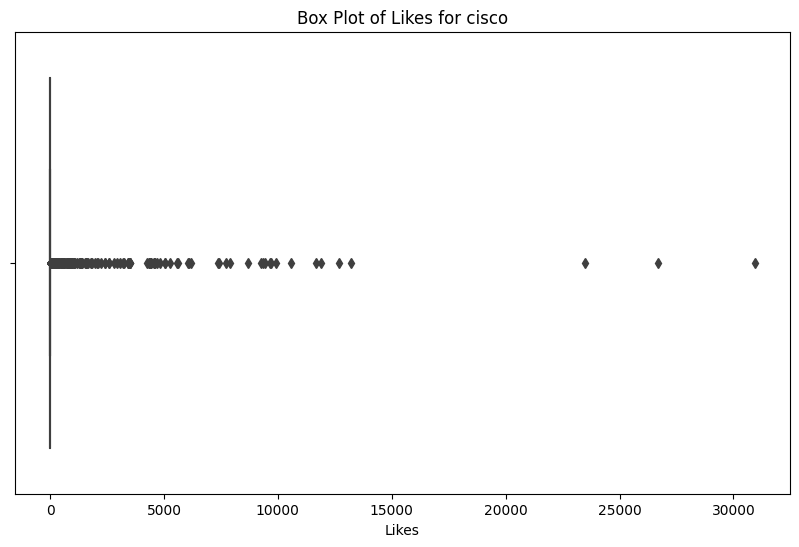

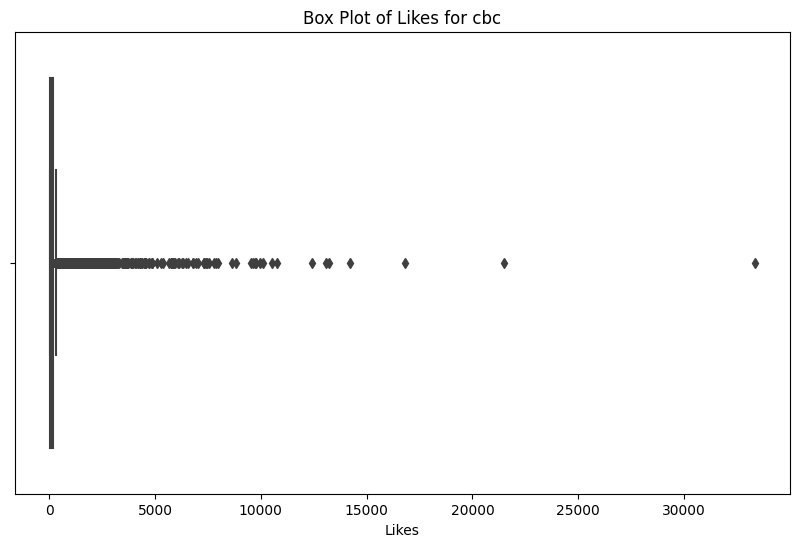

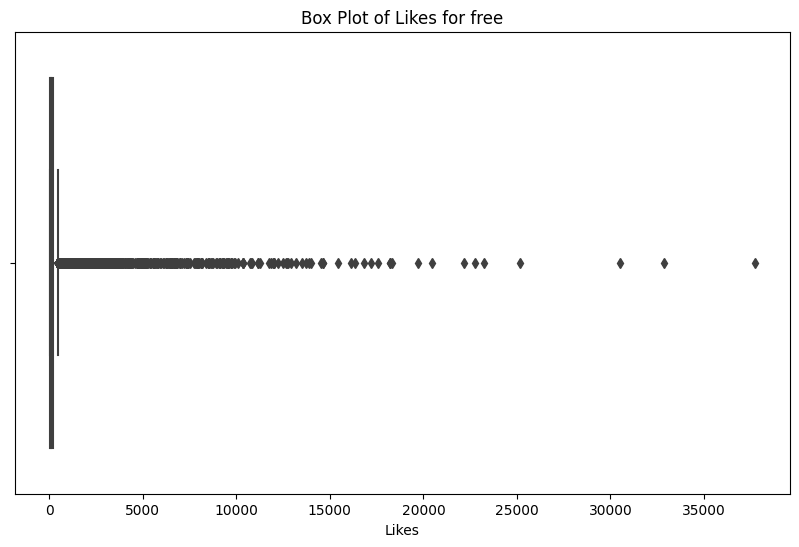

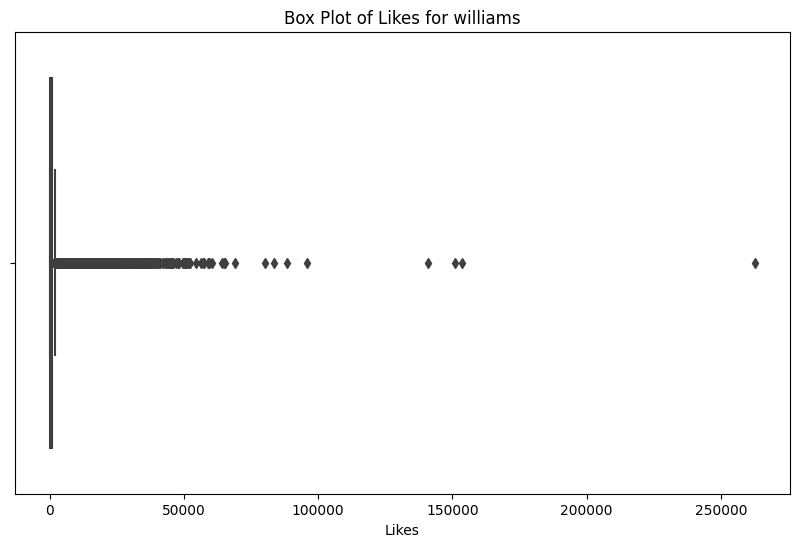

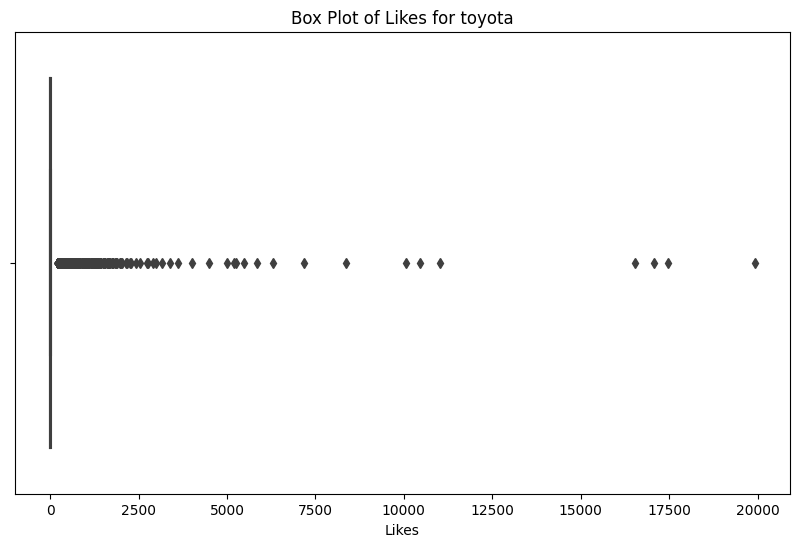

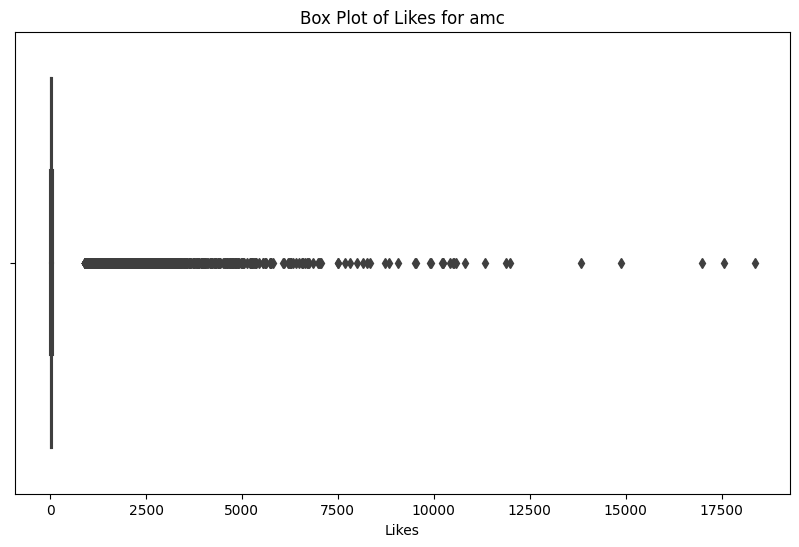

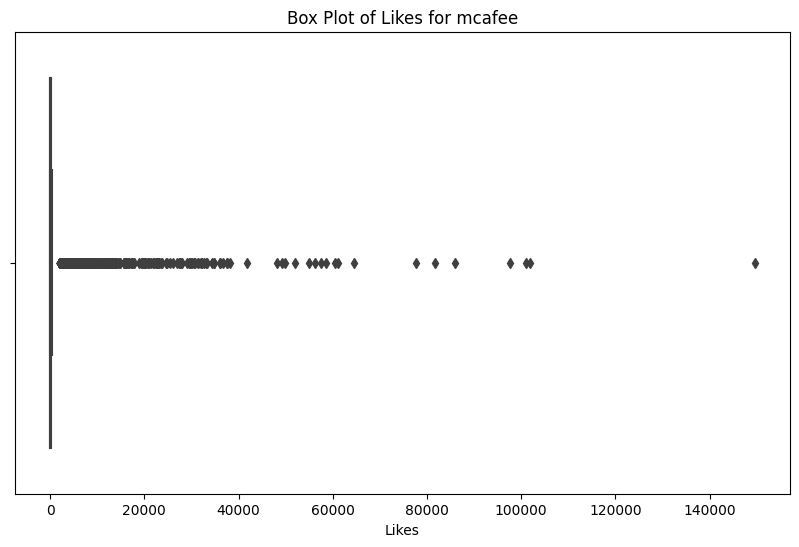

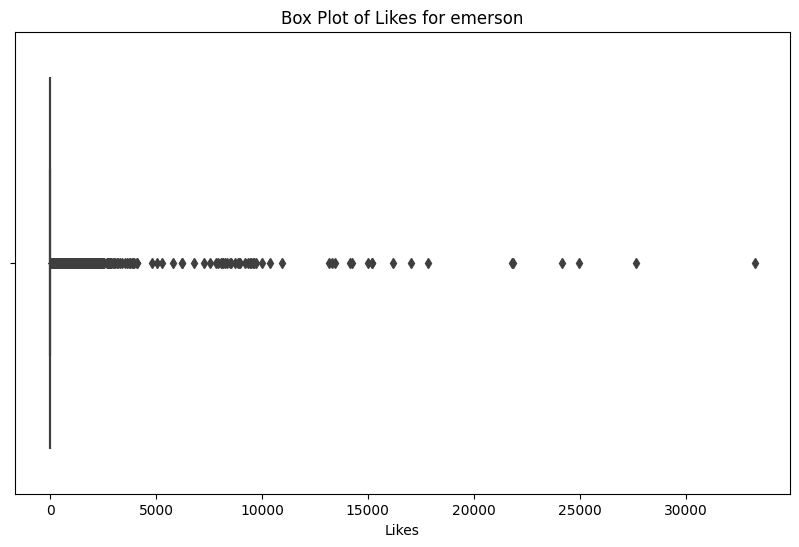

In [104]:
# Create box plots for each company
for company in top_ten_companies:
    company_data = df[df['inferred company'] == company]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=company_data['likes'])
    plt.title(f'Box Plot of Likes for {company}')
    plt.xlabel('Likes')
    plt.show()

# Histograms: To understand the frequency distribution of data.

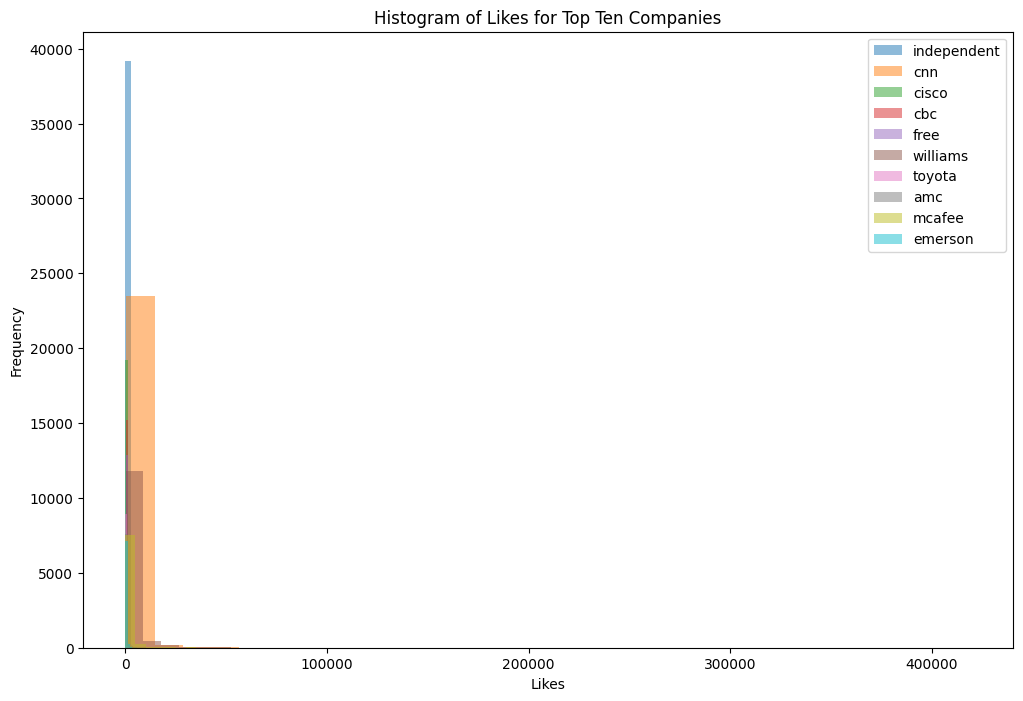

In [109]:
# Create a figure and axis object
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Plot histogram for each company separately
for i, company in enumerate(top_ten_companies):
    company_data = df[df['inferred company'] == company]['likes']
    ax.hist(company_data, bins=30, alpha=0.5, label=company)

# Add labels and legend
plt.title('Histogram of Likes for Top Ten Companies')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

# Metric Comparison

In [122]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'ground_truths' is a numpy array containing ground truth values
# and 'random_outputs' is a numpy array containing random outputs

# Generate random outputs (for demonstration purposes)
np.random.seed(100)  # Setting seed for reproducibility
ground_truths = np.random.rand(1000000)  # Generating random ground truth values
random_outputs = np.random.rand(1000000)  # Generating random outputs

# Calculate evaluation metrics
mse = mean_squared_error(ground_truths, random_outputs)
mae = mean_absolute_error(ground_truths, random_outputs)
pearson_corr, _ = pearsonr(ground_truths, random_outputs)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Pearson Correlation Coefficient: {pearson_corr}")


Mean Squared Error (MSE): 0.16653958259735757
Mean Absolute Error (MAE): 0.3331381741010507
Pearson Correlation Coefficient: 0.001022555886486061
